### IBM Open Science Prize 2022 Submission
#### Authors: Jaewon Jung, Jinwoo Yu, Junho Lim, Hokyun Kim

### Table of Contents
##### 1. Define Kagome lattice
##### 2. Construct Hamiltonian variational ansatz 
##### 3. Results from real hardware
##### 4. Running VQE

### 1. Define Kagome lattice

In [1]:
import rustworkx as rx

import matplotlib.pyplot as plt


from qiskit_nature.problems.second_quantization.lattice import Lattice

# Custom Heisenberg couplings
import sys
sys.path.append(r'.')  # may be needed if running notebook on a cloud service
from heisenberg_model import HeisenbergModel

from qiskit_nature.mappers.second_quantization import LogarithmicMapper

c:\Users\c5517\python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\c5517\python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\c5517\python\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\c5517\python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


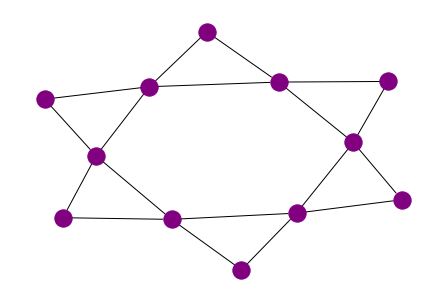

In [2]:
# Kagome unit cell
num_sites = 12
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph = rx.PyGraph(multigraph=False)
graph.add_nodes_from(range(num_sites))
edge_list = [
    (0, 1, t),
    (1, 2, t),
    (2, 3, t),
    (3, 4, t),
    (4, 5, t),
    (5, 0, t),
    (0, 6, t),
    (1, 6, t),
    (1, 7, t),
    (2, 7, t),
    (2, 8, t),
    (3, 8, t),
    (3, 9, t),
    (4, 9, t),
    (4, 10, t),
    (5, 10, t),
    (5, 11, t),
    (0, 11, t),
]
# Generate graph from the list of edges
graph.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell = Lattice(graph)

# Draw Lattice
kagome_unit_cell.draw(style={'node_color':'purple'})
# plt.savefig('kagome_unit_cell.png')
plt.show()

In [3]:
# Build Hamiltonian from graph edges
heis = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell,
    uniform_interaction=1.0,  # same spin-spin interaction weight as used in graph
    uniform_onsite_potential=0.0,  # No singe site external field
)

# The Lattice needs an explicit mapping to the qubit states.
# We map 1 qubit for 1 spin-1/2 particle using the LogarithmicMapper
log_mapper = LogarithmicMapper()
# Multiply by factor of 4 to account for (1/2)^2 terms from spin operators in the HeisenbergModel
ham = 4 * log_mapper.map(heis.second_q_ops().simplify())
# Print Hamiltonian to check it's what we expect.
# There are 18 edges and 3 terms per edge (XX, YY, and ZZ),
# so there should be 54 equally weighted terms.
ham

PauliSumOp(SparsePauliOp(['ZIIIIIZIIIII', 'IZIIIIZIIIII', 'IZIIIIIZIIII', 'IIZIIIIZIIII', 'IIIIIIZZIIII', 'IIZIIIIIZIII', 'IIIZIIIIZIII', 'IIIIIIIZZIII', 'IIIZIIIIIZII', 'IIIIZIIIIZII', 'IIIIIIIIZZII', 'IIIIZIIIIIZI', 'IIIIIZIIIIZI', 'IIIIIIIIIZZI', 'ZIIIIIIIIIIZ', 'IIIIIZIIIIIZ', 'IIIIIIZIIIIZ', 'IIIIIIIIIIZZ', 'YIIIIIYIIIII', 'IYIIIIYIIIII', 'IYIIIIIYIIII', 'IIYIIIIYIIII', 'IIIIIIYYIIII', 'IIYIIIIIYIII', 'IIIYIIIIYIII', 'IIIIIIIYYIII', 'IIIYIIIIIYII', 'IIIIYIIIIYII', 'IIIIIIIIYYII', 'IIIIYIIIIIYI', 'IIIIIYIIIIYI', 'IIIIIIIIIYYI', 'YIIIIIIIIIIY', 'IIIIIYIIIIIY', 'IIIIIIYIIIIY', 'IIIIIIIIIIYY', 'XIIIIIXIIIII', 'IXIIIIXIIIII', 'IXIIIIIXIIII', 'IIXIIIIXIIII', 'IIIIIIXXIIII', 'IIXIIIIIXIII', 'IIIXIIIIXIII', 'IIIIIIIXXIII', 'IIIXIIIIIXII', 'IIIIXIIIIXII', 'IIIIIIIIXXII', 'IIIIXIIIIIXI', 'IIIIIXIIIIXI', 'IIIIIIIIIXXI', 'XIIIIIIIIIIX', 'IIIIIXIIIIIX', 'IIIIIIXIIIIX', 'IIIIIIIIIIXX'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j

In [4]:
from qiskit.algorithms import NumPyEigensolver
import numpy as np
# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=3)
exact_result = exact_solver.compute_eigenvalues(ham)
print(exact_result.eigenvalues)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

[-18.         -18.         -16.96132284]


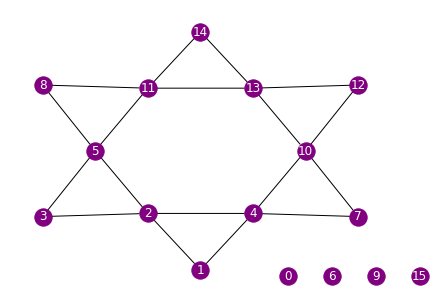

In [5]:
# Kagome unit cell
num_qubits = 16
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph_16 = rx.PyGraph(multigraph=False)
graph_16.add_nodes_from(range(num_qubits))
edge_list = [
    (1, 2, t),
    (2, 3, t),
    (3, 5, t),
    (5, 8, t),
    (8, 11, t),
    (11, 14, t),
    (14, 13, t),
    (13, 12, t),
    (12, 10, t),
    (10, 7, t),
    (7, 4, t),
    (4, 1, t),
    (4, 2, t),
    (2, 5, t),
    (5, 11, t),
    (11, 13, t),
    (13, 10, t),
    (10, 4, t),
]
# Generate graph from the list of edges
graph_16.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell_16 = Lattice(graph_16)

# Draw Lattice and include labels to check we exclude the right spins
# Specify node locations for better visualizations
kagome_pos = {0:[1,-1], 6:[1.5,-1], 9:[2,-1], 15:[2.5,-1], 
              1:[0,-0.8], 2:[-0.6,1], 4:[0.6,1], 10:[1.2,3], 
              13:[0.6,5], 11:[-0.6,5], 5:[-1.2,3], 3:[-1.8,0.9], 
              8:[-1.8,5.1], 14:[0,6.8], 7:[1.8,0.9], 12:[1.8,5.1]}
kagome_unit_cell_16.draw(style={'with_labels':True, 'font_color':'white', 'node_color':'purple', 'pos':kagome_pos})
plt.show()

In [6]:
# Build Hamiltonian from graph edges
heis_16 = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell_16,
    uniform_interaction=t,
    uniform_onsite_potential=0.0,  # No singe site external field
)

# Map from SpinOp to qubits just as before.
log_mapper = LogarithmicMapper()
ham_16 = 4 * log_mapper.map(heis_16.second_q_ops().simplify())
# Print Hamiltonian to check it's what we expect:
# 18 ZZ, 18 YY, and 18 XX terms over 16 qubits instead of over 12 qubits
ham_16

PauliSumOp(SparsePauliOp(['IZZIIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIIZIIIIIII', 'IIIIZIIIIIZIIIII', 'IIIIIIIZIIZIIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIIIZIIZIIII', 'IIIIIIIIIIZIZIII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIIIZIZII', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIZZI', 'IYYIIIIIIIIIIIII', 'IIYYIIIIIIIIIIII', 'IYIIYIIIIIIIIIII', 'IIYIYIIIIIIIIIII', 'IIYIIYIIIIIIIIII', 'IIIYIYIIIIIIIIII', 'IIIIYIIYIIIIIIII', 'IIIIIYIIYIIIIIII', 'IIIIYIIIIIYIIIII', 'IIIIIIIYIIYIIIII', 'IIIIIYIIIIIYIIII', 'IIIIIIIIYIIYIIII', 'IIIIIIIIIIYIYIII', 'IIIIIIIIIIYIIYII', 'IIIIIIIIIIIYIYII', 'IIIIIIIIIIIIYYII', 'IIIIIIIIIIIYIIYI', 'IIIIIIIIIIIIIYYI', 'IXXIIIIIIIIIIIII', 'IIXXIIIIIIIIIIII', 'IXIIXIIIIIIIIIII', 'IIXIXIIIIIIIIIII', 'IIXIIXIIIIIIIIII', 'IIIXIXIIIIIIIIII', 'IIIIXIIXIIIIIIII', 'IIIIIXIIXIIIIIII', 'IIIIXIIIIIXIIIII', 'IIIIIIIXIIXIIIII', 'IIIIIXIIIIIXIIII', 'IIIIIIIIXIIXIIII', 'IIIIIIIIIIXIX

### 2. Construct Hamiltonian variational ansatz 

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='<IBM Quantum API key>')

QiskitRuntimeService.save_account(channel='ibm_quantum', token='Your token', overwrite=True)
service = QiskitRuntimeService(channel='ibm_quantum',instance='ibm-q-community/ibmquantumawards/open-science-22')

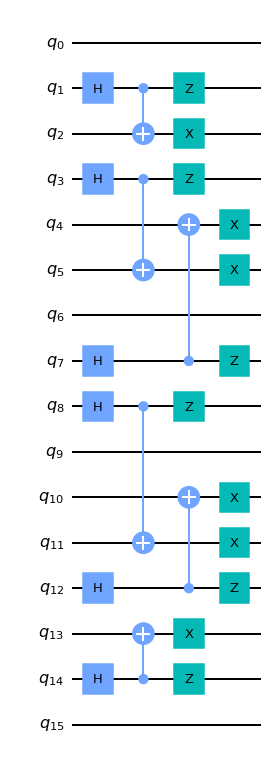

In [130]:
# ansatz: product of singlet states, considering hardware's qubit layout
from qiskit import *
import numpy as np

ansatz= QuantumCircuit(16)

init_sgl=[[1,2],[3,5],[8,11],[14,13],[12,10],[7,4]]

for i in init_sgl:
    ansatz.h(i[0])
    ansatz.cnot(i[0],i[1])
    ansatz.x(i[1])
    ansatz.z(i[0])


ansatz.draw('mpl')

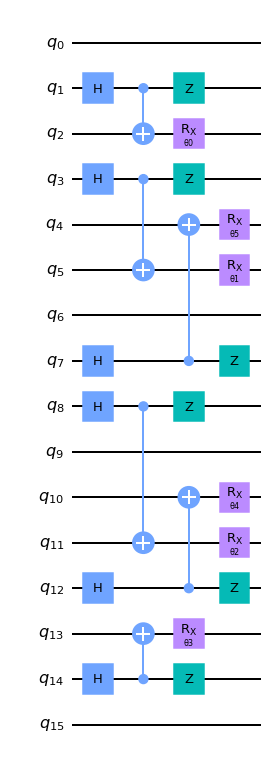

In [208]:
# ansatz: product of singlet states with rx gates instead of x gates, considering hardware's qubit layout
from qiskit import *
import numpy as np
from qiskit.circuit import Parameter

ansatz= QuantumCircuit(16)

init_sgl=[[1,2],[3,5],[8,11],[14,13],[12,10],[7,4]]
j=0
for i in init_sgl:
    ansatz.h(i[0])
    ansatz.cnot(i[0],i[1])
    ansatz.rx(Parameter('θ'+str(j)),i[1])
    j+=1
    ansatz.z(i[0])

ansatz.draw('mpl')

### Constructing hamiltonian variational ansatz 
##### (We didn't use this full ansatz, since initial state with product of singlet states was good enough to get ground state energy)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


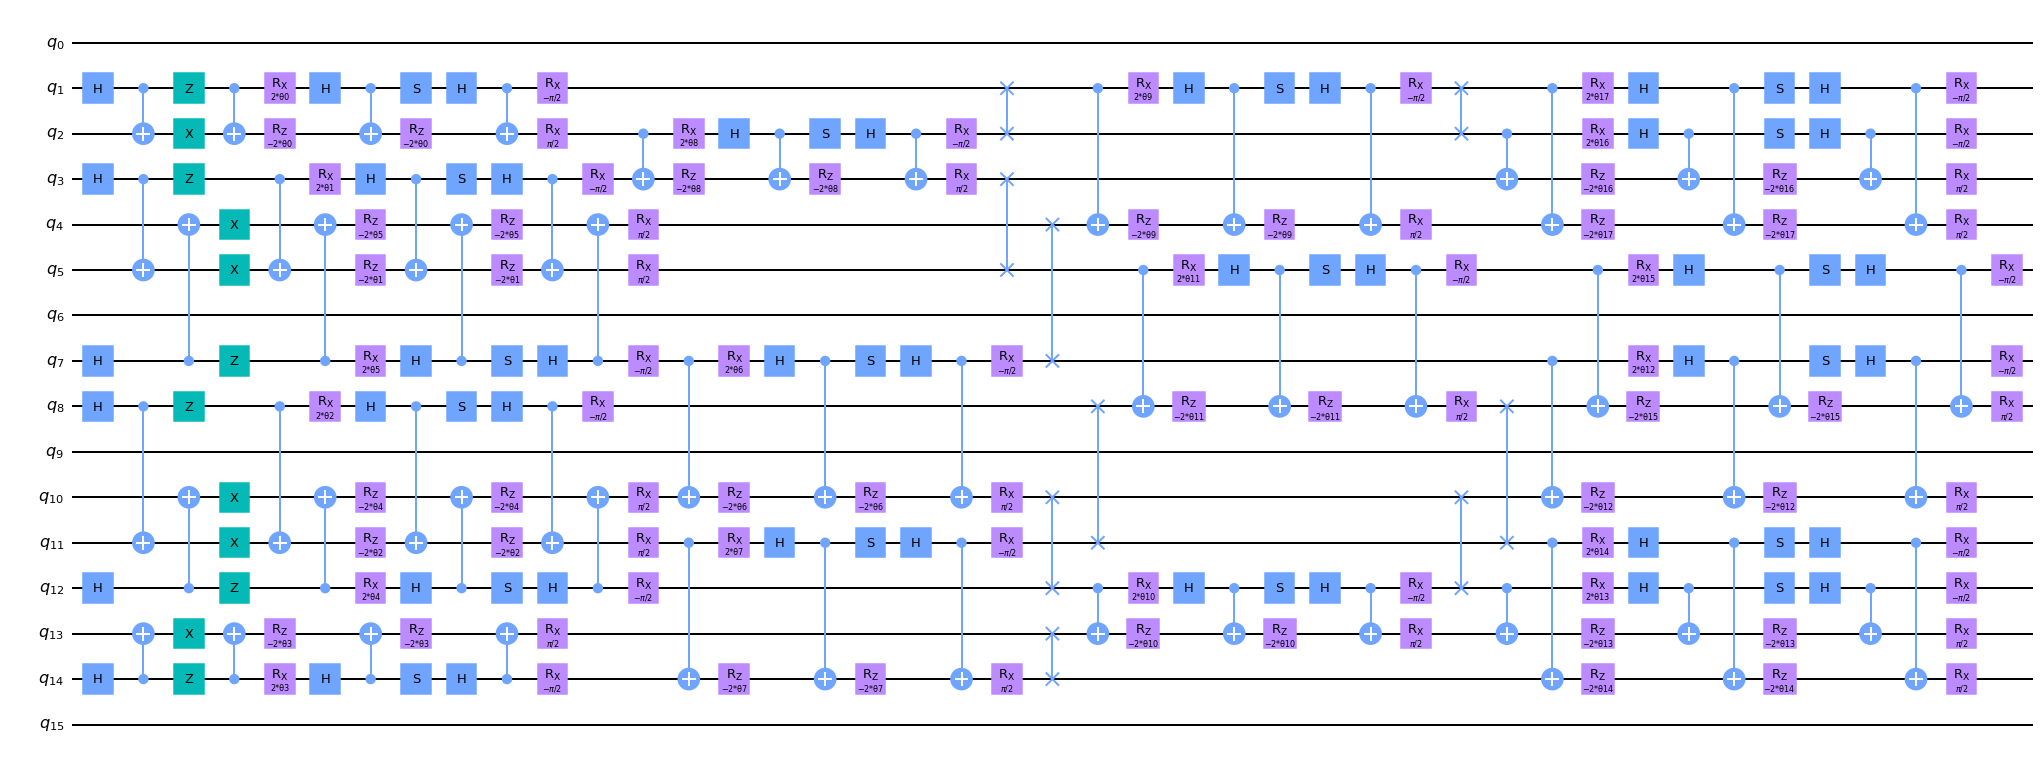

In [129]:
# make sure to run this cell right after the ansatz cell without parameter
# Figure is HVA with trotter step = 1
# connection
con0=[[1,2],[3,5],[8,11],[14,13],[12,10],[7,4]] #HEIS, time evolution for initial hamiltonian
con1=[[7,10],[11,14],[2,3]] #HEIS
con2=[[4,7],[10,12],[13,14],[8,11],[3,5],[1,2]] #SWAP
con3=[[1,4],[12,13],[5,8]] #HEIS
con4=[[1,2],[10,12],[8,11]] #SWAP
con5=[[7,10],[12,13],[11,14],[5,8],[2,3],[1,4]] #HEIS
con=[con0,con1,con2,con3,con4,con5]

# variational parameter
# we start from H0 to H(t) so we set theta_per_trotter like below
theta_per_trotter = [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
theta=[]

# S is trotter step
S=1
for i in range(S):
    theta.extend(theta_per_trotter)
print(theta)
# This HEIS gate are the ones with 6 cnots
# def HEIS(circuit,q,time):
#     circuit.rxx(2*time,q[0],q[1])
#     circuit.ryy(2*time,q[0],q[1])
#     circuit.rzz(2*time,q[0],q[1])

# This HEIS gate below is the one with reduced cnot gates
def HEIS(circuit,q,time):
    circuit.cnot(q[0],q[1])
    circuit.rx(2*time,q[0])
    circuit.rz(-2*time,q[1])
    circuit.h(q[0])
    circuit.cnot(q[0],q[1])
    circuit.s(q[0])
    circuit.rz(-2*time,q[1])
    circuit.h(q[0])
    circuit.cnot(q[0],q[1])
    circuit.rx(-np.pi/2,q[0])
    circuit.rx(np.pi/2,q[1])


def compose_ansatz_circuit(circuit, S, con, theta): 
    # loop over S Trotter-Suzuki steps 
    for j in range(S):
        for k in range(len(con[0])):
            HEIS(circuit,con[0][k],theta[j*18+k])
        for k in range(len(con[1])):
            HEIS(circuit,con[1][k],theta[j*18+6+k])
        for k in con[2]:
            circuit.swap(k[0],k[1])
        for k in range(len(con[3])):
            HEIS(circuit,con[3][k],theta[j*18+9+k])
        for k in con[4]:
            circuit.swap(k[0],k[1])
        for k in range(len(con[5])):
            HEIS(circuit,con[5][k],theta[j*18+12+k])
    return circuit
from qiskit.circuit import Parameter
# Set parameter
a = []
j = 0
for i in range(len(theta)):
    a.append(Parameter('θ' + str(j)))
    j+=1
ans = compose_ansatz_circuit(ansatz,S,con,a)
ans.draw('mpl', fold = 100)

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeGuadalupeV2

number and type of gates in the cirucit: OrderedDict([('rz', 12), ('sx', 6), ('cx', 6), ('x', 6)])
number of parameters in the circuit: 0
Depth of the circuit: 5
Duration of the circuit: None dt


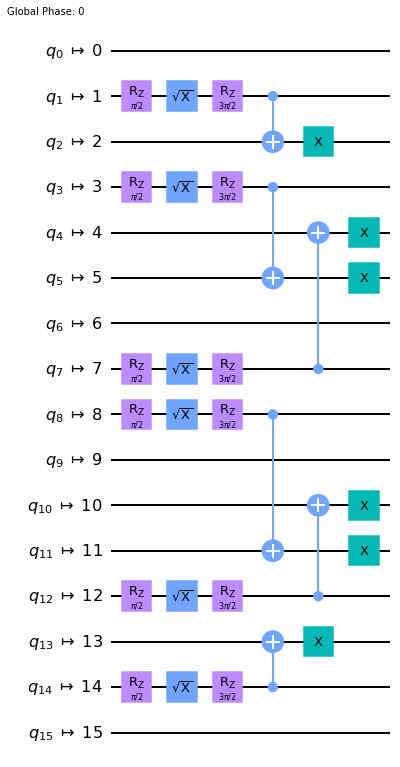

In [131]:
# For real hardware, we don't use alap scheduling since it occurs error.
# Still we can use alap scheduling when we run simulators.
backend = service.get_backend('ibmq_guadalupe')
q_layout = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ansatz_opt = transpile(ansatz, backend=backend, initial_layout=q_layout, seed_transpiler= 1234, optimization_level=3)
# ansatz_opt = transpile(ansatz, backend=backend, initial_layout=q_layout, seed_transpiler= 1234, optimization_level=3, scheduling_method='alap')
print('number and type of gates in the cirucit:', ansatz_opt.count_ops())
print('number of parameters in the circuit:', ansatz_opt.num_parameters)
print('Depth of the circuit:', ansatz_opt.depth())
print('Duration of the circuit:', ansatz_opt.duration, 'dt')
ansatz_opt.draw('mpl',fold=300, idle_wires=True)

In [98]:
# This is the error we got if we use alap scheduling on real hardware
estimator.session.service.job('cgrdf91dkt2eq77n9sag').logs()

'2023-04-15T13:59:27.093412543Z Setting up watches.\n2023-04-15T13:59:27.093412543Z Watches established.\n2023-04-15T13:59:28.525206134Z INFO:     Started server process [7]\n2023-04-15T13:59:28.525206134Z INFO:     Waiting for application startup.\n2023-04-15T13:59:28.525340192Z INFO:     Application startup complete.\n2023-04-15T13:59:28.526308419Z INFO:     Uvicorn running on http://127.0.0.1:8081 (Press CTRL+C to quit)\n2023-04-15T14:02:17.501611656Z INFO:     127.0.0.1:47502 - "POST /run HTTP/1.1" 202 Accepted\n2023-04-15T14:03:13.072964000Z --- Logging error ---\n2023-04-15T14:03:13.074632165Z Traceback (most recent call last):\n2023-04-15T14:03:13.074671921Z   File "/provider/programruntime/program_starter_wrapper.py", line 84, in execute\n2023-04-15T14:03:13.074671921Z     final_result = self.main(backend, self.messenger, **self.user_params)\n2023-04-15T14:03:13.074671921Z   File "/code/program.py", line 1485, in main\n2023-04-15T14:03:13.074671921Z     result = estimator.run(\

In [23]:
def rel_err(target, measured):
    return abs((target - measured) / target)

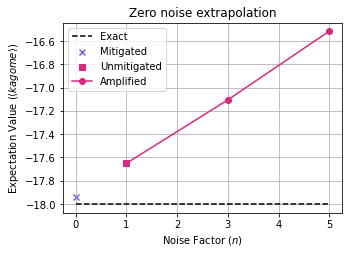

-17.94051836604918 0.0033045352194900346


In [26]:
# Running zne estimator with Aersimulator with guadalupe's NoiseModel and coupling_map
from zne import zne, ZNEStrategy
from zne.noise_amplification import CxAmplifier
from zne.extrapolation import PolynomialExtrapolator
from qiskit_ibm_runtime import (Options, Estimator as RuntimeEstimator)
from qiskit_aer.noise import NoiseModel

# Setting zne estimator
zneestimator = zne(RuntimeEstimator) 
zne_strategy = ZNEStrategy(
    noise_factors=(1,3,5),
    noise_amplifier = CxAmplifier(),
    extrapolator = PolynomialExtrapolator(degree=1)
)

# Get NoiseModel and coupling_map from ibmq_guadalupe
noisy_backend = service.get_backend('ibmq_guadalupe')
backend_noise_model = NoiseModel.from_backend(noisy_backend)
coupling_map = noisy_backend.configuration().coupling_map
simulator = service.get_backend('ibmq_qasm_simulator')

# setting runtime and transpilation options
options = Options()
options.resilience_level = 1
options.optimization_level = 3
options.simulator = {
    "noise_model": backend_noise_model,
    "coupling_map": coupling_map,
    'seed_simulator': 6322   
}

options.transpilation.skip_transpilation = False
options.transpilation.approximation_degree = 1
options.transpilation.routing_method = 'none'
estimator = zneestimator(session = simulator, options=options, zne_strategy=zne_strategy)

# Run the job
job = estimator.run(
    circuits=ansatz_opt,
    observables=ham_16,
    parameter_values=None
)
    
result = job.result()
############################  DATA  ############################
exact = gs_energy
mitigated = result.values[0]
noise_factors = result.metadata[0]["zne"]["noise_amplification"]["noise_factors"]
noisy_values = result.metadata[0]["zne"]["noise_amplification"]["values"]

############################  PLOT  ############################
plt.rcParams["figure.figsize"] = (5,3.5)
plt.grid(which='major',axis='both')

plt.plot([0, noise_factors[-1]], [exact, exact], "--", label=f"Exact", color="#000000")
plt.scatter(0, mitigated, label=f"Mitigated", marker="x", color="#785ef0")
if noise_factors[0] == 1:
    plt.scatter(
        noise_factors[0], noisy_values[0], 
        label=f"Unmitigated", marker="s", color="#dc267f",
    )
plt.plot(
    noise_factors, noisy_values, 
    label=f"Amplified", marker="o", color="#dc267f",
)

plt.title("Zero noise extrapolation")
plt.xlabel("Noise Factor ($n$)")
plt.ylabel(f"Expectation Value ($\langle kagome \\rangle$)")
plt.legend()

plt.show()
print(mitigated, rel_err(gs_energy,mitigated))

### 3. Results from real hardware

In [27]:
# Run runtime estimator with real hardware with error mitigations such as zne, and mitigation from qiskit runtime
# The jobs below this cells were obtained from this cell with the ansatz without parameters

from zne import zne, ZNEStrategy
from zne.noise_amplification import CxAmplifier
from zne.extrapolation import PolynomialExtrapolator
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,Options,
                                Estimator as RuntimeEstimator)

zneestimator = zne(RuntimeEstimator) 
zne_strategy = ZNEStrategy(
    noise_factors=(1,3,5),
    noise_amplifier = CxAmplifier(),
    extrapolator = PolynomialExtrapolator(degree=1)
)

noisy_backend = service.get_backend('ibmq_guadalupe')

options = Options()
options.resilience_level = 1
options.optimization_level = 3

options.transpilation.skip_transpilation = False
options.transpilation.approximation_degree = 1
options.transpilation.routing_method = 'none'
estimator = zneestimator(session = noisy_backend, options=options, zne_strategy=zne_strategy)
job = estimator.run(
    circuits=ansatz_opt,
    observables=ham_16,
    parameter_values=None
)
    
result = job.result()

In [28]:
# Jobs we ran on ibmq_guadalupe
job_list = ['cgqlo63nv0ivfloqsoh0', 'cgqlo7umln5a7t843re0', 'cgqlo8umln5a7t843ssg', 'cgqloa3nv0ivfloqsto0', 'cgqlob3nv0ivfloqsv3g', 
            'cgqlocbnv0ivfloqt0kg', 'cgqloe9dkt25ev7v2qdg', 'cgqlofc42474d0hrl9bg', 'cgqlohrnv0ivfloqt7jg', 'cgqlojc42474d0hrldr0',
            'cgqlolrnv0ivfloqtc4g', 'cgqlpsntpqa043bsn5s0', 'cgqlpuemln5a7t845oq0', 'cgqlq2c42474d0hrn23g', 'cgqlq3emln5a7t845tq0',
            'cgqlq4k42474d0hrn470', 'cgqlq5pdkt25ev7v41m0', 'cgqlq8rnv0ivfloqv4m0', 'cgqlqbc5firqikfme8j0', 'cgqlqc6mln5a7t8468dg',
            'cgqlqeemln5a7t846ar0', 'cgqlqgs42474d0hrnii0', 'cgqlqjk42474d0hrnl7g']
result_list = []
for i in range(len(job_list)):
    result_list.append(zne_strategy.mitigate_noisy_result(estimator.session.service.job(job_list[i]).result()))


In [132]:
# Job inputs
example_job = estimator.session.service.job(job_list[7])
example_job.inputs

{'circuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x28574c2d910>,
 'parameters': [[], [], []],
 'run_options': {'shots': 4000,
  'init_qubits': True,
  'noise_model': None,
  'seed_simulator': None},
 'circuit_indices': [0, 1, 2],
 'observable_indices': [0, 1, 2],
 'transpilation_settings': {'approximation_degree': 1,
  'optimization_settings': {'level': 3},
  'basis_gates': None,
  'coupling_map': None,
  'layout_method': None,
  'initial_layout': None,
  'routing_method': 'none',
  'skip_transpilation': False},
 'observables': [SparsePauliOp(['IZZIIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIIZIIIIIII', 'IIIIZIIIIIZIIIII', 'IIIIIIIZIIZIIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIIIZIIZIIII', 'IIIIIIIIIIZIZIII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIIIZIZII', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIZZI', 'IYYIIIIIIIIIIIII', 'IIYYIIIIIIIIIIII', 'IYIIYIIIIIIIIIII', 'IIYIYIIIIIIIIII

Figure of amplified ansatz with noise factors = (1,3,5)

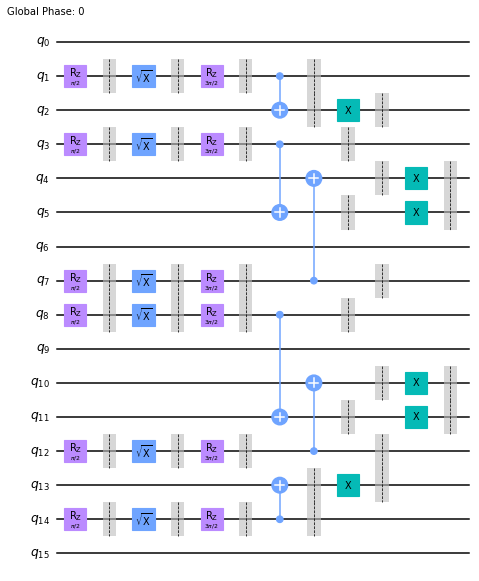

In [133]:
example_job.inputs['circuits'][0].draw('mpl', scale = 3/4)

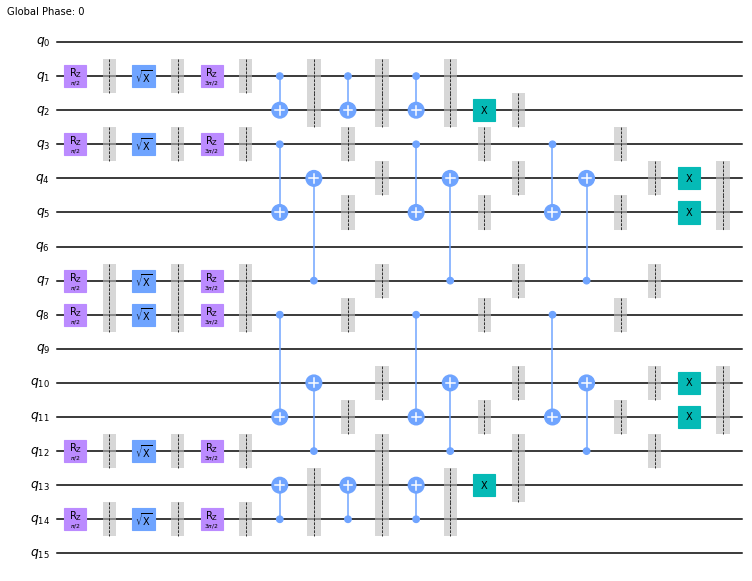

In [134]:
example_job.inputs['circuits'][1].draw('mpl', scale = 3/4)

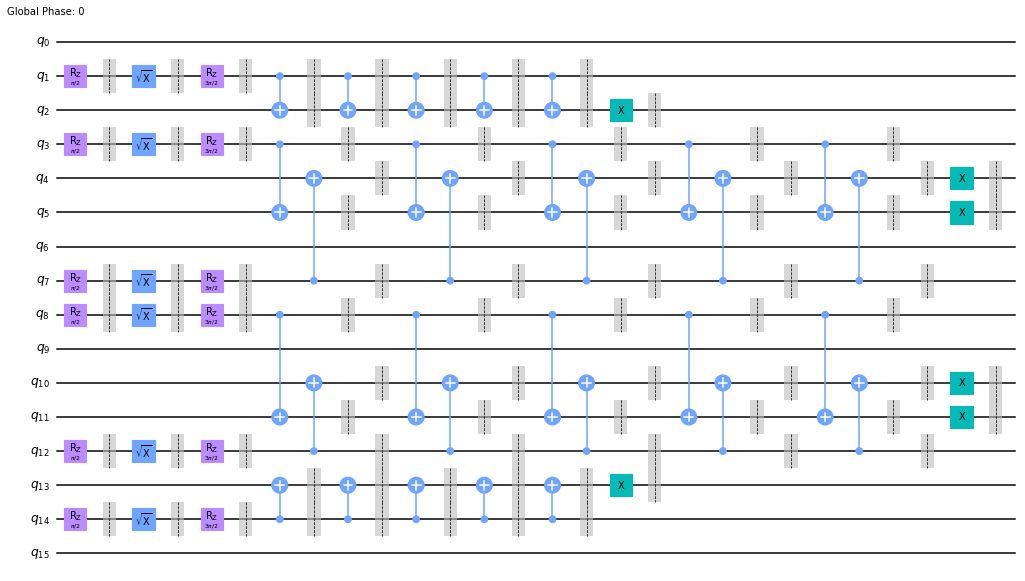

In [135]:
example_job.inputs['circuits'][2].draw('mpl', fold = 30, scale = 3/4)

In [70]:
# Get results below 1% error
count = 0
index_list = []
for i in range(len(result_list)):
    if rel_err(result_list[i].values, -18)*100 < 1:
        count+=1
        index_list.append(i)
    else:
        pass
index_list, count

([7, 8, 14], 3)

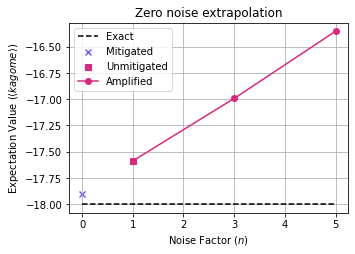

mitigated energy = -17.905, rel_err(%) = 0.529


In [94]:
i= 7 
exact = -18
mitigated = result_list[i].values[0]
noise_factors = result_list[i].metadata[0]["zne"]["noise_amplification"]["noise_factors"]
noisy_values = result_list[i].metadata[0]["zne"]["noise_amplification"]["values"]
plt.rcParams["figure.figsize"] = (5,3.5)
plt.grid(which='major',axis='both')

plt.plot([0, noise_factors[-1]], [exact, exact], "--", label=f"Exact", color="#000000")
plt.scatter(0, mitigated, label=f"Mitigated", marker="x", color="#785ef0")
if noise_factors[0] == 1:
    plt.scatter(
        noise_factors[0], noisy_values[0], 
        label=f"Unmitigated", marker="s", color="#dc267f",
    )
plt.plot(
    noise_factors, noisy_values, 
    label=f"Amplified", marker="o", color="#dc267f",
)

plt.title("Zero noise extrapolation")
plt.xlabel("Noise Factor ($n$)")
plt.ylabel(f"Expectation Value ($\langle kagome \\rangle$)")
plt.legend()

plt.show()
print('mitigated energy = '+ str(round(mitigated,3))+','
      ,'rel_err(%) = ' + str(round(100*rel_err(gs_energy,mitigated),3)))

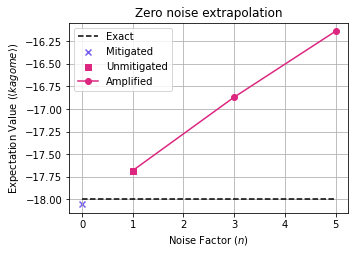

mitigated energy = -18.053, rel_err(%) = 0.293


In [95]:
i= 8
exact = -18
mitigated = result_list[i].values[0]
noise_factors = result_list[i].metadata[0]["zne"]["noise_amplification"]["noise_factors"]
noisy_values = result_list[i].metadata[0]["zne"]["noise_amplification"]["values"]
plt.rcParams["figure.figsize"] = (5,3.5)
plt.grid(which='major',axis='both')

plt.plot([0, noise_factors[-1]], [exact, exact], "--", label=f"Exact", color="#000000")
plt.scatter(0, mitigated, label=f"Mitigated", marker="x", color="#785ef0")
if noise_factors[0] == 1:
    plt.scatter(
        noise_factors[0], noisy_values[0], 
        label=f"Unmitigated", marker="s", color="#dc267f",
    )
plt.plot(
    noise_factors, noisy_values, 
    label=f"Amplified", marker="o", color="#dc267f",
)

plt.title("Zero noise extrapolation")
plt.xlabel("Noise Factor ($n$)")
plt.ylabel(f"Expectation Value ($\langle kagome \\rangle$)")
plt.legend()

plt.show()
print('mitigated energy = '+ str(round(mitigated,3))+','
      ,'rel_err(%) = ' + str(round(100*rel_err(gs_energy,mitigated),3)))

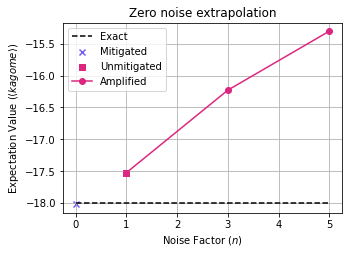

mitigated energy = -18.022, rel_err(%) = 0.121


In [96]:
i= 14
exact = -18
mitigated = result_list[i].values[0]
noise_factors = result_list[i].metadata[0]["zne"]["noise_amplification"]["noise_factors"]
noisy_values = result_list[i].metadata[0]["zne"]["noise_amplification"]["values"]
plt.rcParams["figure.figsize"] = (5,3.5)
plt.grid(which='major',axis='both')

plt.plot([0, noise_factors[-1]], [exact, exact], "--", label=f"Exact", color="#000000")
plt.scatter(0, mitigated, label=f"Mitigated", marker="x", color="#785ef0")
if noise_factors[0] == 1:
    plt.scatter(
        noise_factors[0], noisy_values[0], 
        label=f"Unmitigated", marker="s", color="#dc267f",
    )
plt.plot(
    noise_factors, noisy_values, 
    label=f"Amplified", marker="o", color="#dc267f",
)

plt.title("Zero noise extrapolation")
plt.xlabel("Noise Factor ($n$)")
plt.ylabel(f"Expectation Value ($\langle kagome \\rangle$)")
plt.legend()

plt.show()
print('mitigated energy = '+ str(round(mitigated,3))+','
      ,'rel_err(%) = ' + str(round(100*rel_err(gs_energy,mitigated),3)))

### 4. Running VQE

In [99]:
from qiskit.algorithms.optimizers import SPSA, ADAM, L_BFGS_B, COBYLA, P_BFGS, SLSQP, GradientDescent, NFT
from qiskit.utils import algorithm_globals
from time import time
algorithm_globals.random_seed = 1234

In [100]:
from qiskit.algorithms import MinimumEigensolver, VQEResult

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):
    
    def __init__(self, estimator, circuit, optimizer, callback=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._callback = callback
        
    def compute_minimum_eigenvalue(self, operators, aux_operators=None):
                
        # Define objective function to classically minimize over
        def objective(x):
            # Execute job with estimator primitive
            job = self._estimator.run([self._circuit], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            param = x
            # Save result and parameters information using callback function
            if self._callback is not None:
                self._callback(value, param)
            return value
            
        # Select an initial point for the ansatzs' parameters, we choose parameters as list of pi because our initial states are product of singlet states  
        x0 = np.pi*np.ones(self._circuit.num_parameters)


        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)
        
        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        return result


In [101]:
from IPython.display import clear_output
# Define a simple callback function
intermediate_info = []
param_info = []
def callback(value, param):
        clear_output(wait=True)
        intermediate_info.append(value)
        param_info.append(param)
        plt.plot(intermediate_info, color='purple', lw=2, label='Fakebackend VQE: ' + str(round(value,1)))
        plt.ylabel('Energy')
        plt.xlabel('Iterations')
        # Exact ground state energy value
        plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
        plt.legend()
        plt.grid()
        
        plt.show()

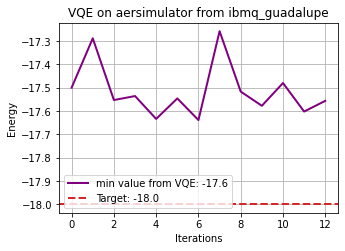

In [147]:
# VQE on aer simulator using ansatz with rx gates, innit params were list of pi
from qiskit_ibm_runtime import (Options, Estimator as RuntimeEstimator)
from qiskit import Aer
from qiskit_aer.noise import NoiseModel

noisy_backend = service.get_backend('ibmq_guadalupe')
backend_noise_model = NoiseModel.from_backend(noisy_backend)

intermediate_info = []
param_info = []
simulator = service.get_backend('ibmq_qasm_simulator')
optimizer = COBYLA(maxiter = 300, rhobeg=1/8)
options = Options()
options.resilience_level = 1
options.optimization_level = 3
options.simulator = {
    "noise_model": backend_noise_model,
    "coupling_map": coupling_map,
    'seed_simulator': 6322   
}

options.transpilation.skip_transpilation = False
options.transpilation.approximation_degree = 1
options.transpilation.routing_method = 'none'

estimator = RuntimeEstimator(circuits = [ansatz_opt], observables=[ham_16], session = simulator ,options=options)
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)

# Run the custom VQE function and monitor execution time
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')

In [ ]:
# We can run VQE on Fakebackend, but we cannot take advantage of qiskit runtime with fake backend, so I don't recommend running vqe on FakeBackend.
from qiskit.providers.fake_provider import FakeGuadalupe, FakeGuadalupeV2, FakeQasmSimulator
from qiskit.primitives import BackendEstimator

optimizer = COBYLA(maxiter = 300, rhobeg=1)

intermediate_info = []
estimator = BackendEstimator(FakeGuadalupeV2())
# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)

# Run the custom VQE function and monitor execution time
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')

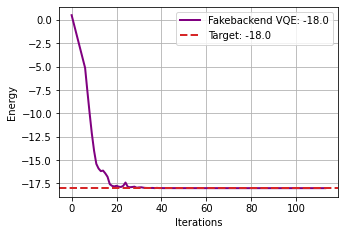

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 114,
    'eigenstate': None,
    'eigenvalue': -17.999999990161243,
    'optimal_circuit': None,
    'optimal_parameters': array([3.1415988 , 3.14160455, 3.14162989, 3.14162126, 3.14150683,
       3.14158327]),
    'optimal_point': None,
    'optimal_value': None,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': None}
execution time (s): 45.09


In [122]:
# VQE run on noise-less simulator, initial parameters were np.ones to show the convergence
from qiskit.algorithms.optimizers import SPSA, ADAM, L_BFGS_B, COBYLA, P_BFGS, SLSQP, GradientDescent, NFT, NELDER_MEAD
from qiskit.primitives import Estimator
optimizer = COBYLA(maxiter=400, rhobeg= 1/2)

intermediate_info = []
param_info = []
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_16])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)

# Run the custom VQE function and monitor execution time
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')